<a href="https://colab.research.google.com/github/cdkutusu1/ESRGAN/blob/master/Real_ESRGAN_Inference_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real-ESRGAN Inference Demo

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2107.10833)
[![GitHub Stars](https://img.shields.io/github/stars/xinntao/Real-ESRGAN?style=social)](https://github.com/xinntao/Real-ESRGAN)
[![download](https://img.shields.io/github/downloads/xinntao/Real-ESRGAN/total.svg)](https://github.com/xinntao/Real-ESRGAN/releases)

This is a **Practical Image Restoration Demo** of our paper [''Real-ESRGAN: Training Real-World Blind Super-Resolution with Pure Synthetic Data''](https://arxiv.org/abs/2107.10833).
We extend the powerful ESRGAN to a practical restoration application (namely, Real-ESRGAN), which is trained with pure synthetic data. <br>
The following figure shows some real-life examples.

<img src="https://raw.githubusercontent.com/xinntao/Real-ESRGAN/master/assets/teaser.jpg" width="100%">

We provide a pretrained model (*RealESRGAN_x4plus.pth*) with upsampling X4.<br>
**Note that RealESRGAN may still fail in some cases as the real-world degradations are really too complex.**<br>
Moreover, it **may not** perform well on **human faces, text**, *etc*, which will be optimized later.
<br>

You can also find a **Portable Windows/Linux/MacOS executable files for Intel/AMD/Nvidia GPU.** in our [GitHub repo](https://github.com/xinntao/Real-ESRGAN). <br>
This executable file is **portable** and includes all the binaries and models required. No CUDA or PyTorch environment is needed.<br>
This executable file is based on the wonderful [Tencent/ncnn](https://github.com/Tencent/ncnn) and [realsr-ncnn-vulkan](https://github.com/nihui/realsr-ncnn-vulkan) by [nihui](https://github.com/nihui).

# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [1]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 682, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 682 (delta 4), reused 11 (delta 1), pack-reused 665
Receiving objects: 100% (682/682), 5.03 MiB | 2.21 MiB/s, done.
Resolving deltas: 100% (359/359), done.
/content/Real-ESRGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 171 kB 32.9 MB/s 
     |████████████████████████████████| 5.9 MB 51.8 MB/s 
     |████████████████████████████████| 190 kB 48.5 MB/s 
  Created wheel for basicsr: filename=basicsr-1.4.1-py3-none-any.whl size=213765 sha256=a24feff04042caf6c9d7388e083537a204573fdd2dfade2be3be90fd3779b186
  Stored in directory: /root/.cache/pip/wheels/36/c5/b3/dc9fdd1dc0f95e37ef35144686bfa374cb81985a38a8539ba0
Successfully built basicsr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
running develop
running egg_info
creating realesrgan.egg-info
writing realesrgan.egg-info/PKG-INFO
writing dependency_links to realesrgan.egg-info/dependency_links.txt
writing requirements to realesrgan.egg-info/requires.txt
writing top-level names to realesrgan.egg-info/top_level.txt
writing manifest file 'realesrgan.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'realesrgan.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/realesrgan.egg-link (link to .)
Adding realesrgan 0.2.5.0 to easy-install.pth file

Installed /content/Real-ESRGAN
Processing dependencies for realesrgan==0.2.5.0
Searching for tqdm==4.64.0
Best match: tqdm 4.64.0
Adding tqdm 4.64.0 to easy-install.pth file
Installing tqdm script to /usr/local/bin

Using /usr/local/lib/python3.7/dist-packages
Searching for torchvis

# 2. Upload Images

Upload the images to be processed by Real-ESRGAN

In [11]:
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving 572485_yazlıkcılar10.03_54_41_13.Still018 3.png to 572485_yazlıkcılar10.03_54_41_13.Still018 3.png
move 572485_yazlıkcılar10.03_54_41_13.Still018 3.png to upload/572485_yazlıkcılar10.03_54_41_13.Still018 3.png


# 3. Inference


In [12]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 3.5 --face_enhance --tile 70
# Arguments
# -n, --model_name: Model names
# -i, --input: input folder or image
# --outscale: Output scale, can be arbitrary scale factore. 

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Testing 0 572485_yazlıkcılar10.03_54_41_13.Still018 3
	Tile 1/99
	Tile 2/99
	Tile 3/99
	Tile 4/99
	Tile 5/99
	Tile 6/99
	Tile 7/99
	Tile 8/99
	Tile 9/99
	Tile 10/99
	Tile 11/99
	Tile 12/99
	Tile 13/99
	Tile 14/99
	Tile 15/99
	Tile 16/99
	Tile 17/99
	Tile 18/99
	Tile 19/99
	Tile 20/99
	Tile 21/99
	Tile 22/99
	Tile 23/99
	Tile 24/99
	Tile 25/99
	Tile 26/99
	Tile 27/99
	Tile 28/99
	Tile 29/99
	Tile 30/99
	Tile 31/99
	Tile 32

# 4. Visualization

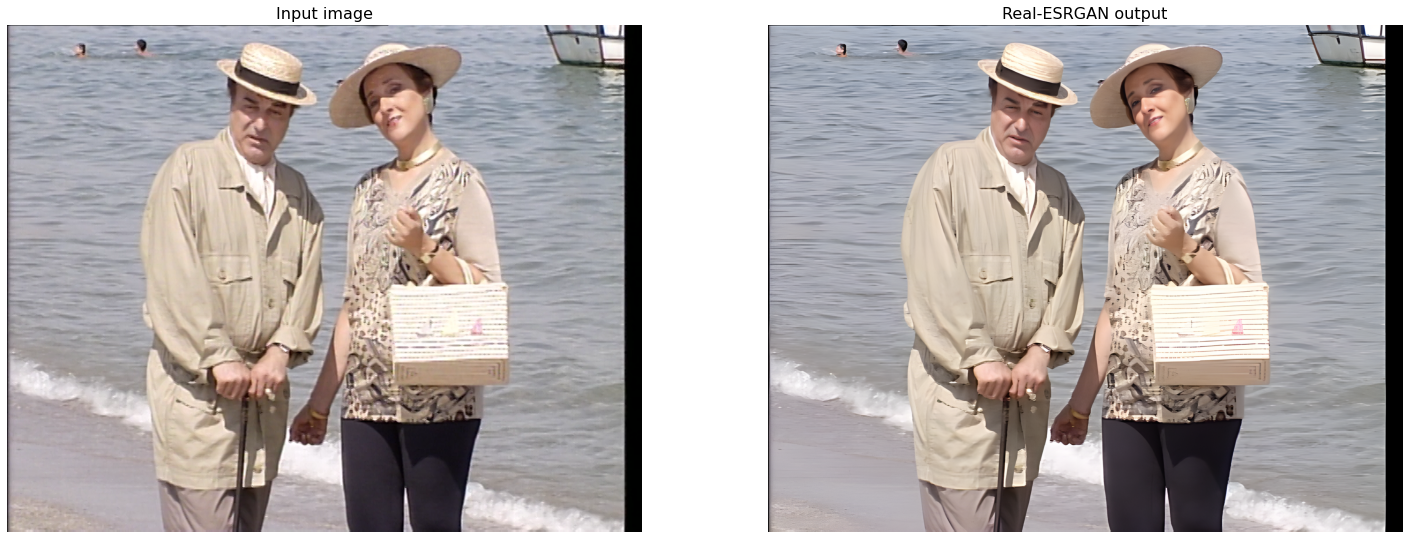

In [13]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 5. Download Results


In [14]:
# Download the results
zip_filename = 'Real-ESRGAN_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>